In [1]:
#importamos los paquetes necesarios
import torch #contiene todas las funciones de PyTorch
import torch.nn as nn #contiene la clase padre de todos los modelos (nn.Module)
import torchvision #fundamental para la importación de imágenes
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
#importamos también matplotlib.pyplot y numpy para la visualización de las imágenes
import matplotlib.pyplot as plt
import numpy as np
import os

C:\Users\samue\anaconda3\envs\venv_py39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#es necesario incluir la siguiente línea para que no se produzcan errores en la representación de las imágenes (entran en conflicto algunos ficheros de matplotlib con los de PyTorch sino)
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [24]:
#establecemos el tamaño del batch y la escala de las imágenes
batch = 4
escala = 300

In [25]:
#a continuación definimos la operación que permitirá transformar las imágenes del repositorio en Tensores que puedan ser empleados por PyTorch
transform = transforms.Compose(
    [transforms.ToTensor(), #transforma la imagen de formato PIL a formato tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #normaliza el tensor para que la media de sus valores sea 0 y su desviación estándar 0.5
     transforms.Resize((escala, escala))]) 

In [26]:
#a continuación cargamos el conjunto de imágenes de train (OCT) y los dos de test (iPhone y Samsung)
OCT = ImageFolder(root = 'Datos/Processed Data/OCT', transform = transform)
print(f'Tamaño del conjunto de datos de train: {len(OCT)}')

Samsung = ImageFolder(root = 'Datos/Processed Data/Samsung', transform = transform)
print(f'Tamaño del conjunto de datos de test de Samsung: {len(Samsung)}')

iPhone = ImageFolder(root = 'Datos/Processed Data/iPhone', transform = transform)
print(f'Tamaño del conjunto de datos de test de iPhone: {len(iPhone)}')

Tamaño del conjunto de datos de train: 113
Tamaño del conjunto de datos de test de Samsung: 93
Tamaño del conjunto de datos de test de iPhone: 99


In [27]:
#establecemos una lista con el nombre de las etiquetas
classes = OCT.classes

In [28]:
#y definimos también las funciones que van a ir cargando las imágenes en el modelo
train_loader = DataLoader(
    dataset = OCT,
    batch_size = 4, #establecemos un tamaño de lote (batch_size) de 4, ya que son pocas imágenes y podemos permitírnoslo
    shuffle = True, #indicamos que mezcle las imágenes
    num_workers = 2 #genera subprocesos para cargar los datos y así liberamos el proceso main
)

test_S_loader = DataLoader(
    dataset = Samsung,
    batch_size = 4, #establecemos un tamaño de lote (batch_size) de 10, ya que son pocas imágenes y podemos permitírnoslo
    shuffle = True, #indicamos que mezcle las imágenes
    num_workers = 2 #genera subprocesos para cargar los datos y así liberamos el proceso main
)

test_i_loader = DataLoader(
    dataset = iPhone,
    batch_size = 4, #establecemos un tamaño de lote (batch_size) de 10, ya que son pocas imágenes y podemos permitírnoslo
    shuffle = True, #indicamos que mezcle las imágenes
    num_workers = 2 #genera subprocesos para cargar los datos y así liberamos el proceso main
)

In [44]:
#para comprobar que los loaders funcionan correctamente vamos a probar a cargar las imágenes y mostrarlas
#para ello definimos la siguiente función
def imshow(img):
    #primero desnormalizamos
    img = img/2+0.5
    #convertimos a matriz de numpy
    npimg = img.numpy()
    #y mostramos, es importante cambiar el orden de las dimensiones, ya que los tensores primero almacenan los canales de la imagen y después el ancho y alto
    plt.figure(figsize = (20,7))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [33]:
#convertimos el train_loader a iterador, para poder así coger un batch
#el batch está compuesto por una tupla de 2 elementos: las imágenes (tensores en este caso) y las etiquetas asociadas
images, labels = next(iter(train_loader))

IMÁGENES DEL CONJUNTO DE TRAIN


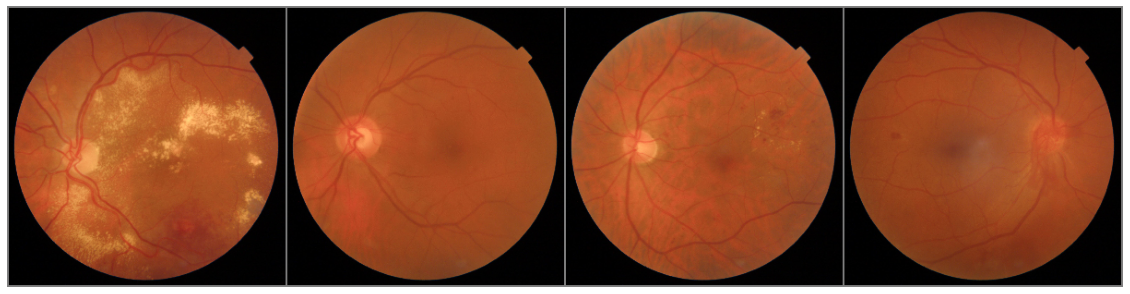

   G3				   G1				   G4				   G5


In [51]:
#mostramos las imágenes y las labels asociadas
print('IMÁGENES DEL CONJUNTO DE TRAIN')
imshow(torchvision.utils.make_grid(images))
print('\t\t\t\t'.join('%5s' % classes[labels[j]] for j in range(4)))

In [52]:
#hacemos el mismo proceso con las imágenes de test de iPhone
images, labels = next(iter(test_i_loader))

IMÁGENES DEL TEST IPHONE


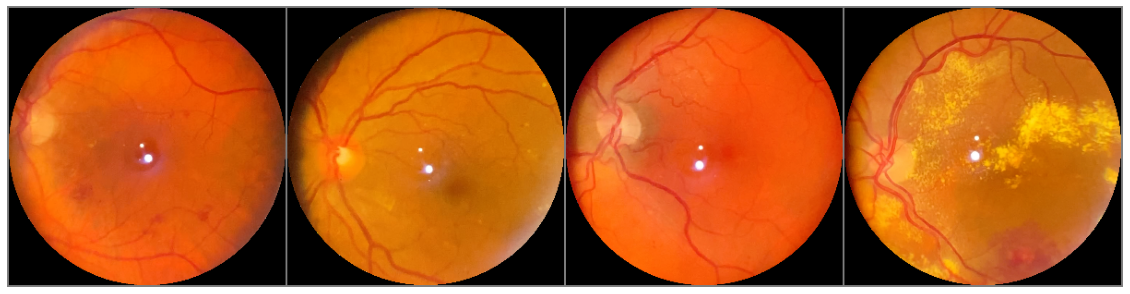

   G5				   G3				   G1				   G5


In [53]:
#mostramos las imágenes y las labels asociadas
print('IMÁGENES DEL TEST IPHONE')
imshow(torchvision.utils.make_grid(images))
print('\t\t\t\t'.join('%5s' % classes[labels[j]] for j in range(4)))

In [54]:
#y con el conjunto de imágenes de test de Samsung
images, labels = next(iter(test_S_loader))

IMÁGENES DEL TEST SAMSUNG


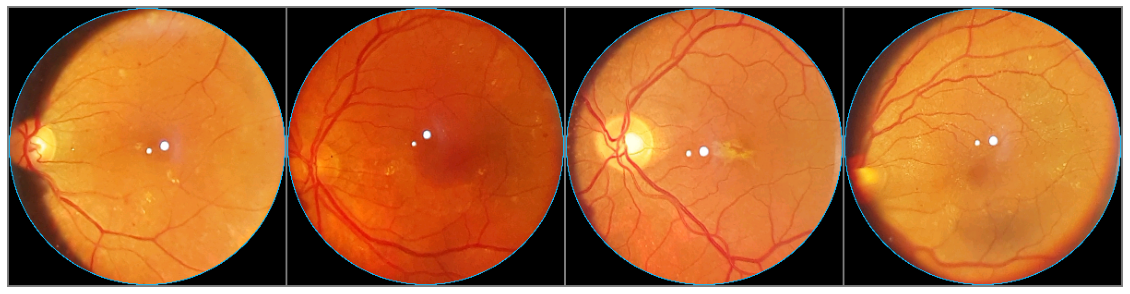

   G3				   G3				   G1				   G3


In [55]:
#mostramos las imágenes y las labels asociadas
print('IMÁGENES DEL TEST SAMSUNG')
imshow(torchvision.utils.make_grid(images))
print('\t\t\t\t'.join('%5s' % classes[labels[j]] for j in range(4)))